In [1]:
import pdfplumber

In [37]:
input_path = '../../../test-pdfs/attention.pdf'

In [39]:
pdf_file = pdfplumber.open(input_path)

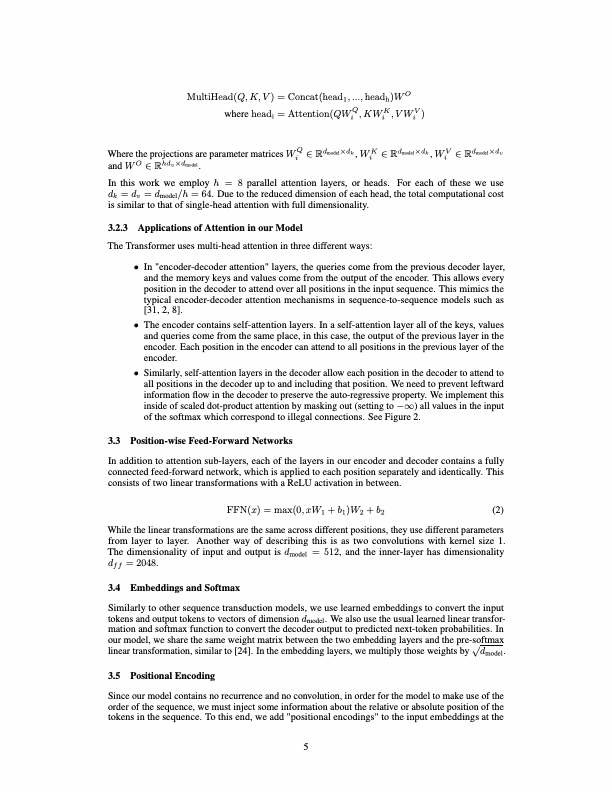

In [50]:
page = pdf_file.pages[4]
page.to_image()

In [42]:
fonts = set([char["fontname"] for char in page.chars])
fonts

{'BTGPSN+NimbusRomNo9L-Regu',
 'CTAILX+NimbusRomNo9L-Medi',
 'EDCQSD+CMMI7',
 'FUIULY+CMR10',
 'LICAEO+CMMI10'}

In [45]:
# all font sizes
font_sizes = set([char["size"] for char in page.chars])
font_sizes

{6.973799999999983,
 6.973799999999997,
 9.962599999999952,
 9.96259999999998,
 9.962599999999995,
 9.962600000000002,
 9.962600000000009}

In [46]:
# page.chars[0]

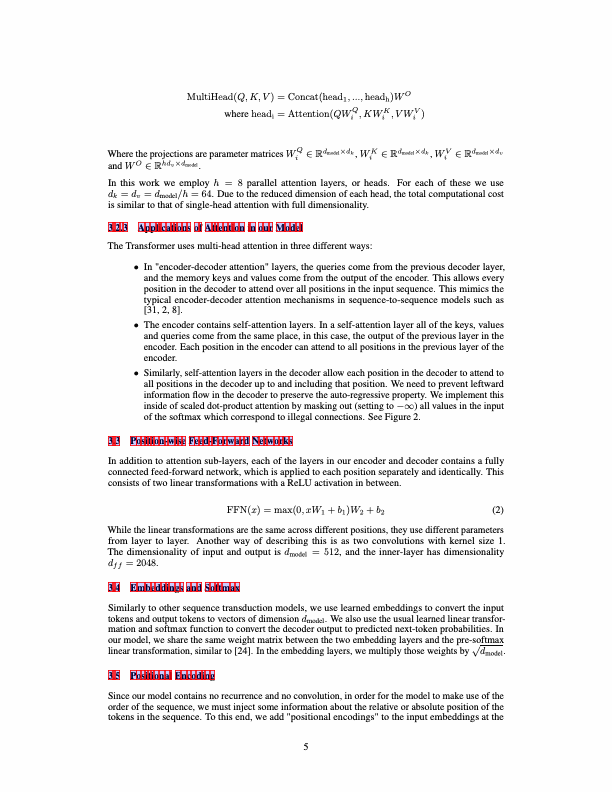

In [51]:
# define functions that return predicates (fn -> char -> bool)
char_font_has_substring    = lambda substring: lambda char: substring.lower() in char["fontname"].lower()
char_fontsize_greater_than = lambda size:      lambda char: char["size"] > size
char_fontsize_eq_to        = lambda size:      lambda char: char["size"] == size
char_x_between             = lambda x0, x1:    lambda char: x0 <= char["x0"] <= x1

# predicate functions (char -> bool)
is_bold    = char_font_has_substring("bold")
is_italic  = char_font_has_substring("italic")
not_empty  = lambda char: char["text"].strip() != ""

# create predicate sets (*(char -> bool) -> char -> bool)
ander = lambda *predicates: lambda char: all(predicate(char) for predicate in predicates)
orrer = lambda *predicates: lambda char: any(predicate(char) for predicate in predicates)

# define condition
predicates = ander(
    char_font_has_substring("medi")
)

header_chars = [char for char in page.chars if predicates(char)]

img = page.to_image()
img = img.draw_rects(header_chars)
# img = img.draw_vline(location=char_x_between[0])
# img = img.draw_vline(location=char_x_between[1])
img